In [26]:
import scipy.io
from scipy.signal import butter, lfilter, filtfilt, iirnotch, sosfilt
import numpy as np
import matplotlib.pyplot as plt

# import required module
import os
n_component = 10

In [2]:
def extract_data_within_intervals(path, level, old = False):
    if old:
        participants = ['pp1', 'pp3', 'pp4', 'pp6', 'pp7', 'pp8', 'pp9']
    else:
        participants = ['pp1', 'pp3', 'pp4', 'pp5', 'pp6', 'pp7', 'pp8', 'pp9', 'pp10']
    all_emg_data = []
    key = level

    for participant in participants:
        emg_path = os.path.join(path, participant, 'EMG')
        pertinfo_path = os.path.join(path, participant, 'pertinfo')
        
        # Process EMG files and pertinfo files
        for emg_file in os.listdir(emg_path):
            if key in emg_file:
                emg_full_path = os.path.join(emg_path, emg_file)
                emg_mat = scipy.io.loadmat(emg_full_path)
                data_EMG = emg_mat['data_EMG']

                # Corresponding pertinfo file
                pertinfo_file = emg_file.replace('EMG', 'pertinfo')  # Adjust if necessary
                pertinfo_full_path = os.path.join(pertinfo_path, pertinfo_file)
                
                if os.path.exists(pertinfo_full_path):
                    pert_mat = scipy.io.loadmat(pertinfo_full_path)
                    time_intervals = pert_mat['time_start_stop']
                    time_intervals = time_intervals[0]
                    
                    start_time, end_time = int(time_intervals[0]* 1000) , int(time_intervals[1] *1000)
                    duration = 3000
                    if 'emg_headers' in emg_mat:
                        emg_headers = [h[0] for h in emg_mat['emg_headers'][0]]
                        emg_data_dict = {header: [] for header in emg_headers}

                        # Extract data for each header within the interval
                        for i, header in enumerate(emg_headers):
                            data_slice = data_EMG[start_time:start_time + duration, i]
                            if not np.isnan(data_slice).all():
                                emg_data_dict[header].append(data_slice)

                        all_emg_data.append({
                            'participant': participant,
                            'file': emg_file,
                            'interval': (start_time, end_time),
                            'data': emg_data_dict
                        })

    return all_emg_data

base_path = '../../Downloads/YoungData_vEMG/YoungData_vEMG'  # Adjust this path as needed
old_path = '../../Downloads/OlderData_vEMG/OlderData_vEMG'
emg_data_within_intervals = extract_data_within_intervals(base_path, 'anterior')
print(len(emg_data_within_intervals))

50


In [3]:
fs = 1000  # Sampling frequency in Hz
lowcut = 20.0  # High-pass filter cutoff frequency
notch_freq = 60.0  # Notch filter frequency
notch_quality_factor = 30.0  # Quality factor for the notch filter
lowpass_freq = 10.0

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='high', output='sos')
    return sos

def apply_notch_filter(freq, quality_factor, fs):
    nyq = 0.5 * fs
    freq = freq / nyq
    b, a = iirnotch(freq, quality_factor)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    sos = butter(order, normal_cutoff, btype='low', output='sos')
    return sosfilt(sos, data)

In [4]:
def process_emg_data(emg_data, lowcut, fs, notch_freq, notch_quality_factor, lowpass_freq):
    process_data = []
    for participant_data in emg_data:
        participant_id = participant_data['participant']
        file_id = participant_data['file']
        interval = participant_data['interval']
        muscles_data = participant_data['data']

        processed_muscles = {}

        for muscle, emg_arrays in muscles_data.items():
            if emg_arrays:  # Check if there is data for this muscle
                emg_signal = emg_arrays[0]  # Assuming there is only one array per muscle

                # High-pass filter
                sos = butter_highpass(lowcut, fs)
                filtered_emg = sosfilt(sos, emg_signal)

                # Notch filter
                b, a = apply_notch_filter(notch_freq, notch_quality_factor, fs)
                filtered_emg = filtfilt(b, a, filtered_emg)

                # Rectification
                rectified_emg = np.abs(filtered_emg)

                # Envelope extraction
                envelope = butter_lowpass_filter(rectified_emg, lowpass_freq, fs)

                # Store processed data for the muscle
                processed_muscles[muscle] = envelope
        
        process_data.append({
            'participant': participant_id,
            'file': file_id,
            'interval': interval,
            'data': processed_muscles
        })

    return process_data

processed_data = process_emg_data(emg_data_within_intervals, lowcut, fs, notch_freq, notch_quality_factor, lowpass_freq)
print(len(processed_data))

50


In [21]:
def aggregate_emg_activations(process_data):
    mus_data_r = []
    mus_data_l = []
    for entry in process_data:
        data_dict = entry['data']
        count = 0
        for muscle, activations in data_dict.items():
            if count < 7:
                if np.all(activations >= 0):
                    mus_data_r.append(activations)
            else:
                if np.all(activations >= 0):
                    mus_data_l.append(activations)  
            count += 1
    return mus_data_r + mus_data_l

exp_act = aggregate_emg_activations(processed_data)
print(len(exp_act))

3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000
3000


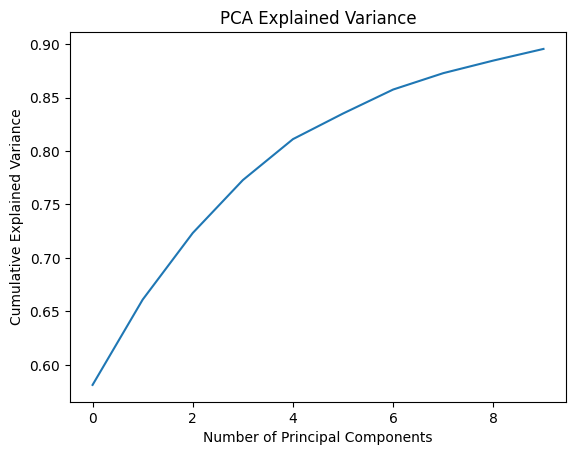

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize PCA; you can specify n_components to the number of principal components you want to keep
pca = PCA(n_components=n_component)  # Adjust the number of components as needed
pca_result_exp = pca.fit_transform(exp_act)

# Explained variance ratio can be plotted to see how much information is captured by each component
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


In [28]:
from sklearn.decomposition import NMF

# Initialize NMF, n_components is the number of synergies you want to extract
nmf = NMF(n_components=n_component, init='random', random_state=0)  # Adjust components as needed
nmf_result_exp = nmf.fit_transform(exp_act)



In [8]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors


name = '2025_02_06_15_05_110SAC'#'2024_11_04_16_24_37' #'2024_06_11_15_11_25' 
env_name = 'myoTorsoReachFixed-v1'
steps = 1000
cut = 100

pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [0, 2, 4, 6, 8, 10]
bins_high = [20, 22, 24, 26, 28, 30]

In [9]:
AP_pert = []
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_AP_high, pert_2_AP_high, pert_3_AP_high, pert_4_AP_high, pert_5_AP_high = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height[-1] > 0.5:
        filtered_data = {
            'modelInfo': data['modelInfo'],
            'muscleInfo': data['muscleInfo'],
            'jointInfo':data['jointInfo']
        }
        stand.append(filtered_data)
    
print(len(stand))
mass = 150

100


In [22]:
sim_act = []
muscle_r = ['recfem_r', 'vaslat_r', 'bflh_r', 'bfsh_r', 'tibant_r', 'gaslat_r', 'soleus_r'] 
muscle_l = ['recfem_l', 'vaslat_l', 'bflh_l', 'bfsh_l', 'tibant_l', 'gaslat_l', 'soleus_l'] 


for data in stand[:42]:
    p_t = int(data['modelInfo']['perturbationTime']*100)
    for i in range(len(muscle_l)):
        #print(len(np.array(data['muscleInfo']['muscleActivation'][muscle_r[i]][p_t:p_t+200])))
        sim_act.append(data['muscleInfo']['muscleActivation'][muscle_r[i]][p_t:p_t+300])
        sim_act.append(data['muscleInfo']['muscleActivation'][muscle_l[i]][p_t:p_t+300])

print(len(sim_act))

588


588


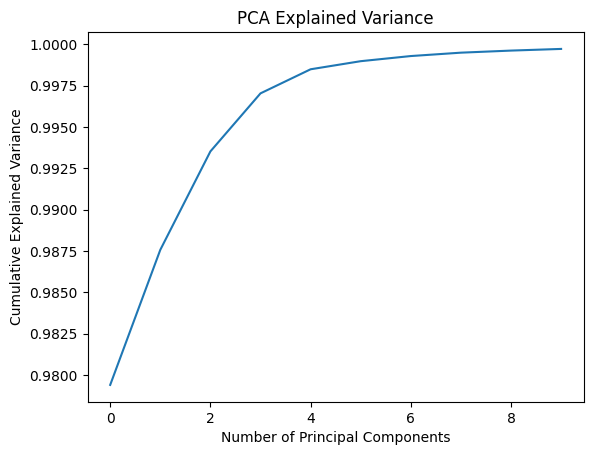

In [29]:
pca = PCA(n_components=n_component)  # Adjust the number of components as needed
pca_result_sim = pca.fit_transform(sim_act)
print(len(pca_result_sim[:, 0]))

# Explained variance ratio can be plotted to see how much information is captured by each component
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


In [30]:
def calculate_average_correlation(pca_sim, pca_exp):
    num_components = pca_sim.shape[1]  # Assuming both have the same number of components
    correlations = []
    
    # Iterate over each component
    for i in range(num_components):
        # Compute correlation for the ith component
        correlation = np.corrcoef(pca_sim[:548, i], pca_exp[:, i])[0, 1]
        correlations.append(correlation)
    
    # Calculate the average correlation across all components
    average_correlation = np.mean(correlations)
    return average_correlation

# Assuming pca_sim and pca_exp are your PCA results from simulation and experimental data
average_correlation = calculate_average_correlation(pca_result_sim, pca_result_exp)
print("Average Correlation Coefficient:", average_correlation)

Average Correlation Coefficient: -0.020324890487220446


In [31]:
nmf = NMF(n_components=n_component, init='random', random_state=0)  # Adjust components as needed
nmf_result_sim = nmf.fit_transform(sim_act)

average_correlation = calculate_average_correlation(nmf_result_sim, nmf_result_exp)
print("Average Correlation Coefficient:", average_correlation)

Average Correlation Coefficient: -0.014148572925944439


c:\Users\chery\Documents\MyoBack\.venv\lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
